In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load metadata
tracks = pd.read_csv("fma_metadata/tracks.csv")
genres = pd.read_csv("fma_metadata/genres.csv")
features = pd.read_csv("fma_metadata/features.csv")
echonest = pd.read_csv("fma_metadata/echonest.csv")

C:\Users\swluk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\swluk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177

In [21]:
# shape of each metafile
metadata = ["tracks", "genres", "features", "echonest"]
shape = [tracks.shape, genres.shape, features.shape, echonest.shape]
print("%s: " % metadata, shape)

['tracks', 'genres', 'features', 'echonest']:  [(106576, 53), (163, 5), (106577, 519), (13132, 250)]


### Tracks metadata

In [24]:
tracks.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


### Genres metadata

In [29]:
genres.head(10)

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
5,6,914,38,Novelty,38
6,7,217,20,Comedy,20
7,8,868,0,Old-Time / Historic,8
8,9,1987,0,Country,9
9,10,13845,0,Pop,10


In [36]:
genres.columns

Index(['genre_id', '#tracks', 'parent', 'title', 'top_level'], dtype='object')

In [45]:
genres['title'].unique()

array(['Avant-Garde', 'International', 'Blues', 'Jazz', 'Classical',
       'Novelty', 'Comedy', 'Old-Time / Historic', 'Country', 'Pop',
       'Disco', 'Rock', 'Easy Listening', 'Soul-RnB', 'Electronic',
       'Sound Effects', 'Folk', 'Soundtrack', 'Funk', 'Spoken', 'Hip-Hop',
       'Audio Collage', 'Punk', 'Post-Rock', 'Lo-Fi', 'Field Recordings',
       'Metal', 'Noise', 'Psych-Folk', 'Krautrock', 'Jazz: Vocal',
       'Experimental', 'Electroacoustic', 'Ambient Electronic',
       'Radio Art', 'Loud-Rock', 'Latin America', 'Drone', 'Free-Folk',
       'Noise-Rock', 'Psych-Rock', 'Bluegrass', 'Electro-Punk', 'Radio',
       'Indie-Rock', 'Industrial', 'No Wave', 'Free-Jazz',
       'Experimental Pop', 'French', 'Reggae - Dub', 'Afrobeat',
       'Nerdcore', 'Garage', 'Indian', 'New Wave', 'Post-Punk', 'Sludge',
       'African', 'Freak-Folk', 'Jazz: Out', 'Progressive',
       'Alternative Hip-Hop', 'Death-Metal', 'Middle East',
       'Singer-Songwriter', 'Ambient', 'Hardcore', 

In [47]:
print("There are", len(genres['title'].unique()), "unique genres")

There are 163 unique genres


(1, 38154)

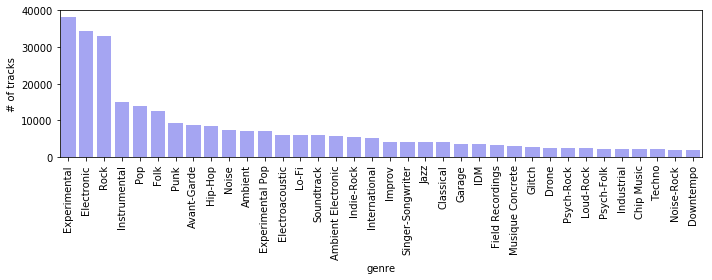

In [54]:
# number of tracks per genre
x = genres[genres['#tracks'] > 2000].sort_values('#tracks', ascending=False)
plt.figure(figsize=(10, 4))
p = sns.barplot('title', '#tracks', data=d, color='b', alpha=0.4)
p.set_xlabel('genre')
p.set_ylabel('# of tracks')
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('genre_distribution.pdf')

genres.loc[genres['#tracks'] > 0, '#tracks'].min(), genres['#tracks'].max()


### Features metadata

In [55]:
features.head()

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02


### Echonest metadata
#### audio features

In [58]:
echonest.head()

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,echonest.4,echonest.5,echonest.6,echonest.7,echonest.8,...,echonest.239,echonest.240,echonest.241,echonest.242,echonest.243,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,metadata,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,NaN,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,214,215,216,217,218,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051


In [59]:
print('Echonest features available for {} tracks.'.format(len(echonest)))

Echonest features available for 13132 tracks.
